In [2]:
import numpy as np
import time
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import model
from inference import log_marginal_likelihood
from utils import hyperparameters

pi = 0.1
mu = 0.0
sigmabg = 0.001
sigma = 0.01
tau = 1 / (0.0005 * 0.0005)

nsample = 300
nsnps = 200
x, y, csnps, v = model.simulate(nsample, nsnps, 
                                pi = pi,
                                mu = mu,
                                sigma = sigma,
                                sigmabg = sigmabg,
                                tau = tau)

nvar = x.shape[0]
nsample = x.shape[1]
params = np.array([pi, mu, sigma, sigmabg, tau])
zstates = [[]]
zstates += [[i] for i in range(nvar)]

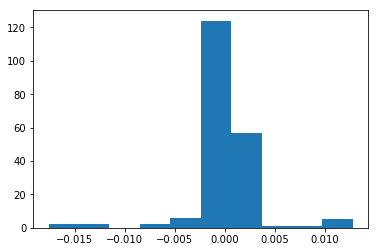

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(v)
plt.show()

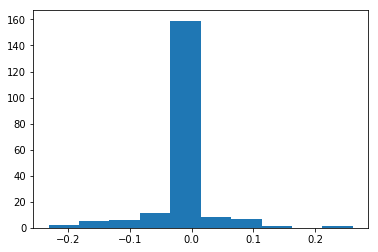

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x.T, y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(regr.coef_)
plt.show()

In [29]:
from sklearn.mixture import GaussianMixture
learn_gm = GaussianMixture(n_components = 2, n_init=100, max_iter = 1000)
learn_gm.fit(v.reshape(-1,1))

x_axis = np.arange(-0.3, 0.3, 0.0001)
weight1 = learn_gm.weights_[0]
mean1   = learn_gm.means_[0][0]
var1    = learn_gm.covariances_[0][0,0]
weight2 = learn_gm.weights_[1]
mean2   = learn_gm.means_[1][0]
var2    = learn_gm.covariances_[1][0,0]

print ("Learned parameters:")
print ("Pi:\t{:g}\t{:g}".format(weight1, weight2))
print ("Mu:\t{:g}\t{:g}".format(mean1, mean2))
print ("Sig:\t{:g}\t{:g}".format(np.sqrt(var1), np.sqrt(var2)))

Learned parameters:
Pi:	0.748099	0.251901
Mu:	-5.52867e-06	-0.0268166
Sig:	0.00147757	0.0956051


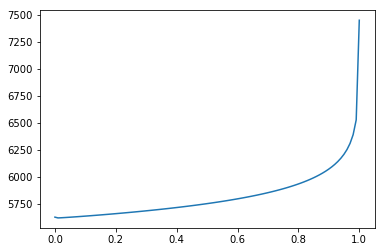

In [10]:
pi_vals = np.linspace(0.000001, 0.9999, 100)
mll_list = list()
for pival in pi_vals:
    params = hyperparameters.scale(np.array([pival, mu, sigma, sigmabg, tau]))
    mll = log_marginal_likelihood.iterative_inverse(params, x, y, zstates, grad = False)[0]
    mll_list.append(mll)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pi_vals, mll_list)
plt.show()

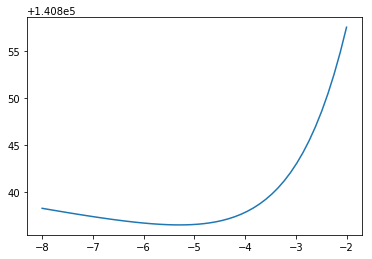

In [13]:
beta_vals = np.linspace(-8, -2, 50)
mll_list = list()
for beta in beta_vals:
    pival = 1 / (1 + np.exp(-beta))
    params = hyperparameters.scale(np.array([pival, mu, sigma, sigmabg, tau]))
    mll = log_marginal_likelihood.iterative_inverse(params, x, y, zstates, grad = False)[0]
    mll_list.append(mll)

fig = plt.figure()
ax = fig.add_subplot(111)
pi_vals =  1 / (1 + np.exp(-beta_vals))
ax.plot(beta_vals, mll_list)
plt.show()

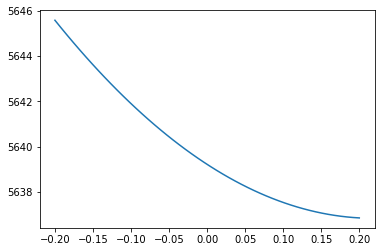

In [12]:
mu_vals = np.linspace(-0.2, 0.2, 50)
mll_list = list()
for muval in mu_vals:
    params = hyperparameters.scale(np.array([pi, muval, sigma, sigmabg, tau]))
    mll = log_marginal_likelihood.iterative_inverse(params, x, y, zstates, grad = False)[0]
    #print(pival, mll)
    mll_list.append(mll)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(mu_vals, mll_list)
plt.show()

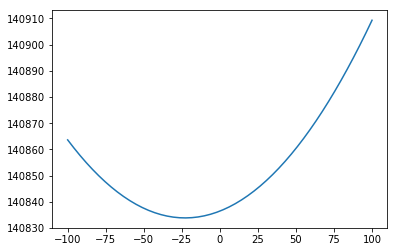

In [14]:
beta_vals = np.linspace(-100, 100, 50)
mll_list = list()
for beta in beta_vals:
    muval = beta / 100
    params = hyperparameters.scale(np.array([0.005, muval, sigma, sigmabg, tau]))
    mll = log_marginal_likelihood.iterative_inverse(params, x, y, zstates, grad = False)[0]
    mll_list.append(mll)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(beta_vals, mll_list)
plt.show()

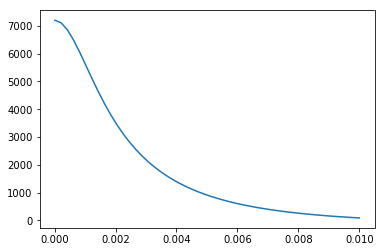

In [14]:
sigbg_vals = np.linspace(0.00001, 0.01, 50)
mll_list = list()
for sigbgval in sigbg_vals:
    params = hyperparameters.scale(np.array([pi, mu, sigma, sigbgval, tau]))
    mll = log_marginal_likelihood.iterative_inverse(params, x, y, zstates, grad = False)[0]
    mll_list.append(mll)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sigbg_vals, mll_list)
plt.show()

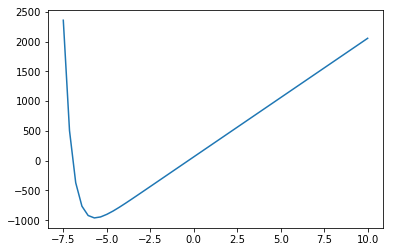

In [76]:
beta_vals = np.linspace(-7.5, 10, 50)
mll_list = list()
for beta in beta_vals:
    sigbgval = np.exp(beta)
    params = hyperparameters.scale(np.array([0.014, mu, sigma, sigbgval, tau]))
    mll = log_marginal_likelihood.iterative_inverse(params, x, y, zstates, grad = False)[0]
    mll_list.append(mll)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(beta_vals, mll_list)
plt.show()

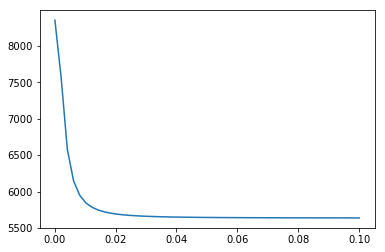

In [16]:
sigma_vals = np.linspace(0.0001, 0.1, 50)
mll_list = list()
for sigmaval in sigma_vals:
    params = hyperparameters.scale(np.array([pi, mu, sigmaval, sigmabg, tau]))
    mll = log_marginal_likelihood.iterative_inverse(params, x, y, zstates, grad = False)[0]
    mll_list.append(mll)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sigma_vals, mll_list)
plt.show()

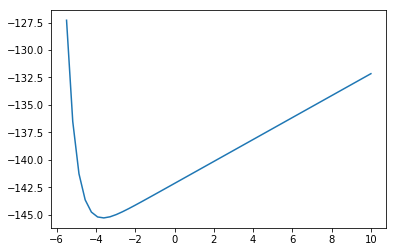

In [77]:
beta_vals = np.linspace(-5.5, 10, 50)
mll_list = list()
for beta in beta_vals:
    sigmaval = np.exp(beta)
    params = hyperparameters.scale(np.array([0.014, mu, sigmaval, sigmabg, tau]))
    mll = log_marginal_likelihood.iterative_inverse(params, x, y, zstates, grad = False)[0]
    mll_list.append(mll)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(beta_vals, mll_list)
plt.show()

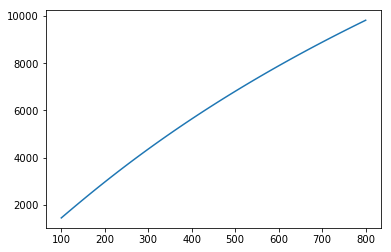

In [18]:
tau_vals = np.linspace(100, 800, 50)
mll_list = list()
for tauval in tau_vals:
    params = hyperparameters.scale(np.array([pi, mu, sigma, sigmabg, tauval]))
    mll = log_marginal_likelihood.iterative_inverse(params, x, y, zstates, grad = False)[0]
    mll_list.append(mll)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(tau_vals, mll_list)
plt.show()

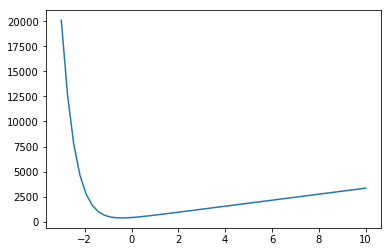

In [23]:
beta_vals = np.linspace(-3, 10, 50)
mll_list = list()
for beta in beta_vals:
    tauval = np.exp(-2 * beta)
    params = hyperparameters.scale(np.array([pi, mu, sigma, sigmabg, tauval]))
    mll = log_marginal_likelihood.iterative_inverse(params, x, y, zstates, grad = False)[0]
    mll_list.append(mll)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(beta_vals, mll_list)
plt.show()

In [25]:
hyperparameters.descale(np.array([-4.5, 25, -2, -4, -1]))

array([ 0.01098694,  0.25      ,  0.13533528,  0.01831564,  7.3890561 ])

In [89]:
from scipy import optimize
zstates = [[]]
zstates += [[i] for i in list(csnps[np.argsort(csnps)])]
args = x, y, zstates
scaledparams = hyperparameters.scale(np.array([0.01, 0.0, 0.01, 0.01, 1 / 0.001 / 0.001]))
bounds = [[scaledparams[i], scaledparams[i]] for i in range(5)]
bounds[0] = [None, None]
#bounds[1] = [None, None]
bounds[2] = [None, None]
bounds[3] = [None, None]
bounds[4] = [None, None]
lml_min = optimize.minimize(log_marginal_likelihood.iterative_inverse,
                            scaledparams,
                            args = args,
                            method='L-BFGS-B',
                            jac=True,
                            bounds=bounds,
                            options={'maxiter': 200000,
                                     'maxfun': 2000000,
                                     'ftol': 1e-6,
                                     'gtol': 1e-4,
                                     'disp': True})

In [79]:
lml_min = optimize.minimize(log_marginal_likelihood.iterative_inverse,
                            scaledparams,
                            args = args,
                            method='BFGS',
                            jac=True,
                            #bounds=bounds,
                            options={'maxiter': 200000,
                                     #'maxfun': 2000000,
                                     #'ftol': 1e-9,
                                     'gtol': 1e-2,
                                     'disp': True})

         Current function value: -1684.663587
         Iterations: 31
         Function evaluations: 128
         Gradient evaluations: 116


In [87]:
lml_min

      fun: -1669.9244502600352
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.        , -0.38977086, -0.01880867, -0.27885918,  0.37123553])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 61
      nit: 17
   status: 0
  success: True
        x: array([ -4.59511985,   0.        ,  -3.65529259,  -5.67894454, -15.16876933])

In [90]:
res = hyperparameters.descale(lml_min.x)
res[4] = np.sqrt(1 / res[4])
print('\n'.join(['{:g}'.format(x) for x in list(res)]))

0.00594537
0
0.028872
0.0034217
2.57453e-07


In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(y)
plt.show()

In [66]:
optimize.show_options(solver='minimize', method="bfgs", disp=True)

Minimization of scalar function of one or more variables using the
BFGS algorithm.

Options
-------
disp : bool
    Set to True to print convergence messages.
maxiter : int
    Maximum number of iterations to perform.
gtol : float
    Gradient norm must be less than `gtol` before successful
    termination.
norm : float
    Order of norm (Inf is max, -Inf is min).
eps : float or ndarray
    If `jac` is approximated, use this value for the step size.


In [67]:
optimize.show_options(solver='minimize', method="l-bfgs-b", disp=True)

Minimize a scalar function of one or more variables using the L-BFGS-B
algorithm.

Options
-------
disp : bool
   Set to True to print convergence messages.
maxcor : int
    The maximum number of variable metric corrections used to
    define the limited memory matrix. (The limited memory BFGS
    method does not store the full hessian but uses this many terms
    in an approximation to it.)
factr : float
    The iteration stops when ``(f^k -
    f^{k+1})/max{|f^k|,|f^{k+1}|,1} <= factr * eps``, where ``eps``
    is the machine precision, which is automatically generated by
    the code. Typical values for `factr` are: 1e12 for low
    accuracy; 1e7 for moderate accuracy; 10.0 for extremely high
    accuracy.
ftol : float
    The iteration stops when ``(f^k -
    f^{k+1})/max{|f^k|,|f^{k+1}|,1} <= ftol``.
gtol : float
    The iteration will stop when ``max{|proj g_i | i = 1, ..., n}
    <= gtol`` where ``pg_i`` is the i-th component of the
    projected gradient.
eps : float
    Step s